In [3]:
import pandas as pd

df =pd.read_csv("Housing.csv")

print(df.shape)
print(df.head())
print(df.info())
print(df.isnull().sum())

(545, 13)
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (tot

In [4]:
binary_cols = ["mainroad", "guestroom", "basement",
               "hotwaterheating", "airconditioning", "prefarea"]

for col in binary_cols:
    df[col] = df[col].map({"yes": 1, "no": 0})


In [5]:
df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=True)


In [6]:
print(df.head())


      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                       

In [7]:
X = df.drop("price", axis=1)
y = df["price"]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")


RMSE: 1324506.9600914388
R-squared: 0.6529242642153184


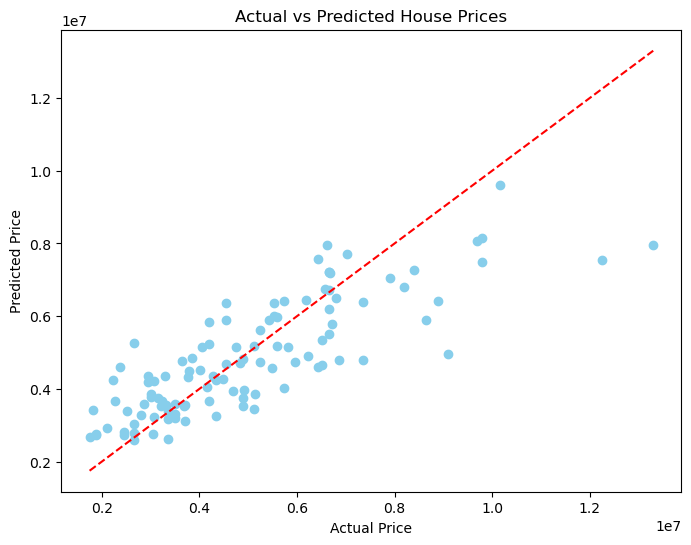

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [12]:
coefficients = pd.Series(lr.coef_, index=X.columns)
print(coefficients.sort_values(ascending=False))


bathrooms                          1.094445e+06
airconditioning                    7.914267e+05
hotwaterheating                    6.846499e+05
prefarea                           6.298906e+05
stories                            4.074766e+05
basement                           3.902512e+05
mainroad                           3.679199e+05
guestroom                          2.316100e+05
parking                            2.248419e+05
bedrooms                           7.677870e+04
area                               2.359688e+02
furnishingstatus_semi-furnished   -1.268818e+05
furnishingstatus_unfurnished      -4.136451e+05
dtype: float64


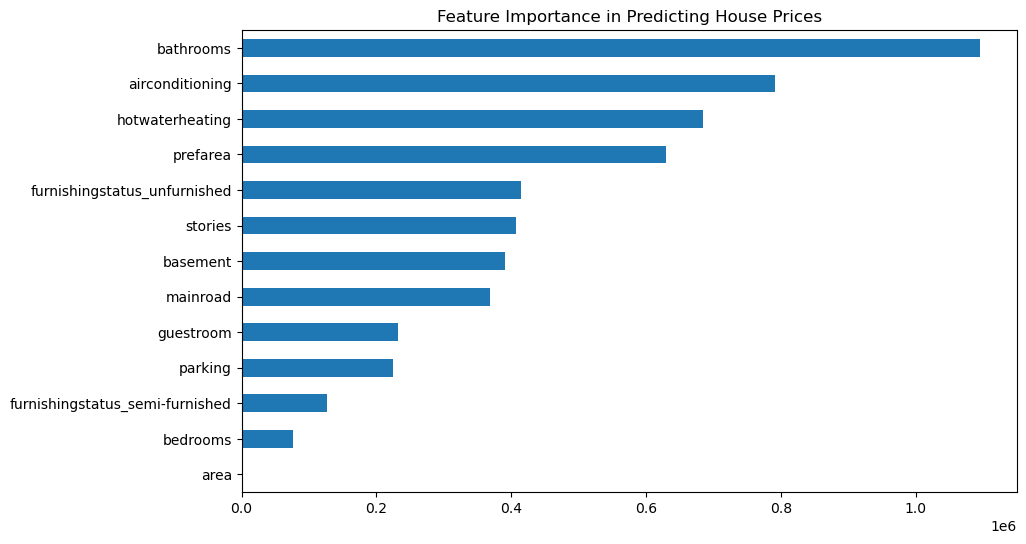

In [13]:
coefficients.abs().sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importance in Predicting House Prices")
plt.show()
